In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
f = lambda theta: 0.5 * ((theta[0] ** 2 - theta[1]) ** 2 + (theta[0] - 1) ** 2)

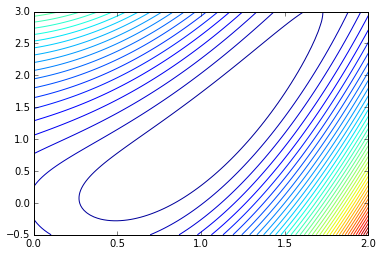

In [40]:
x = np.linspace(0.0, 2.0, 101)
y = np.linspace(-0.5, 3.0, 101)
X, Y = np.meshgrid(x, y)
Z = [[f([xx, yy]) for xx in x] for yy in y]
levels = np.linspace(np.min(Z), np.max(Z), 41)

"""
theta = [0, 0]
eta = 0.1
thetas = [theta]

for i in range(10):
"""    
    

plt.contour(X, Y, Z, levels = levels)
plt.show()